---
### Importing Libraries

In [51]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [52]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cv2
#from deepface import DeepFace
import matplotlib.pyplot as plt

### Uploading the dataset

In [53]:
filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [54]:
data = pd.read_csv('fer2013.csv')
#check data shape
data.shape
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [55]:
#check target labels
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Fear,5121
2,Sad,6077
3,Neutral,6198
4,Happy,8989
5,Surprise,4002
6,Digust,547


### Plotting the Bar Graph for Number of Images for Each Emotion

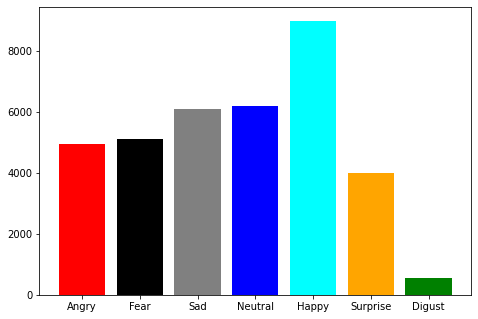

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
emo = emotion_counts['emotion']
num = emotion_counts['number']

# Create bars with different colors
plt.bar(emo, num, color=['red', 'black', 'grey' , 'blue', 'cyan', 'orange', 'green'])


# Show graph
plt.show()

### Plotting some images from the dataset

C:\Users\TV\AppData\Local\Temp/ipykernel_7976/2479706013.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([image.astype(np.uint8), emotion])


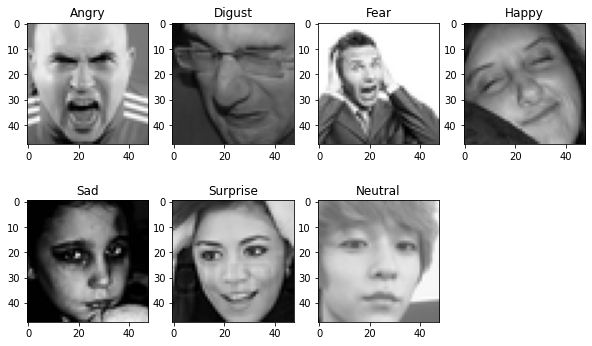

In [57]:
#Let's look at some images...

def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(10,6))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[3]
    img = row2image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()  

In [58]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [59]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [60]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

---
## Facial Feature Extraction Using Haar Cascade Method
--- 

### Eyes and Face Annotation For An Individual Picture

In [61]:
def annotate(img):
    faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyeCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)
    print('Number of faces detected:', len(faces))
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y) , (x+w, y+h) , (0,255,0) , 4)
    eyes = eyeCascade.detectMultiScale(gray, 1.3, 5)
    print('Number of eyes detected:', len(eyes))
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

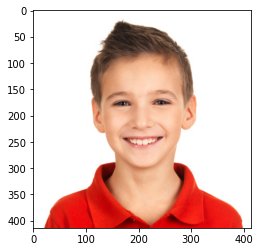

In [62]:
img_hap=cv2.imread("Images/happy.jpeg")
plt.imshow(cv2.cvtColor(img_hap, cv2.COLOR_BGR2RGB))

Number of faces detected: 1
Number of eyes detected: 2


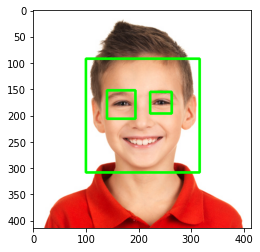

In [63]:
annotate(img_hap)

### Eyes and Face Annotation For Group Pictures

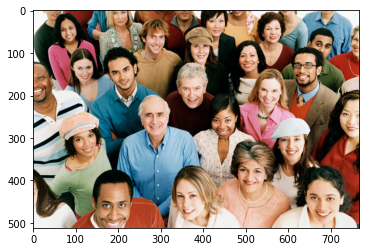

In [64]:
img=cv2.imread("Images/team.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Number of faces detected: 18
Number of eyes detected: 15


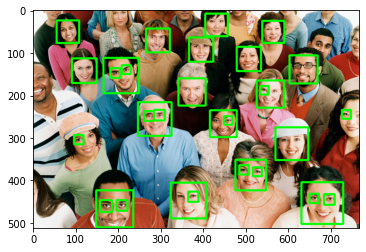

In [65]:
annotate(img)

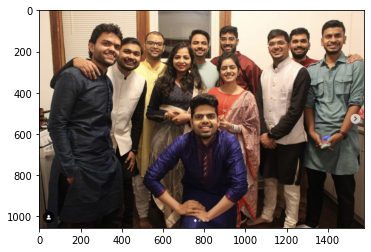

In [66]:
img1=cv2.imread("Images/Diwali.png")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

Number of faces detected: 13
Number of eyes detected: 5


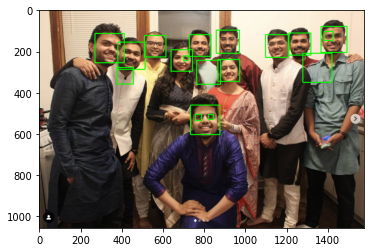

In [67]:
annotate(img1)

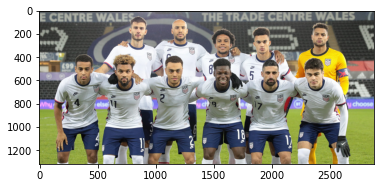

In [68]:
img_mnt=cv2.imread("Images/MNT.jpeg")
plt.imshow(cv2.cvtColor(img_mnt, cv2.COLOR_BGR2RGB))

Number of faces detected: 10
Number of eyes detected: 19


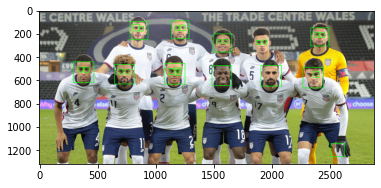

In [69]:
annotate(img_mnt)

### Facial and Eyes Annotation For Images in Our Dataset

In [70]:
def annotate_1(img):
    faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyeCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y) , (x+w, y+h) , (0,255,0) , 4)
    eyes = eyeCascade.detectMultiScale(gray, 1.3, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),4)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

C:\Users\TV\AppData\Local\Temp/ipykernel_7976/2102406473.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([image.astype(np.uint8), emotion])


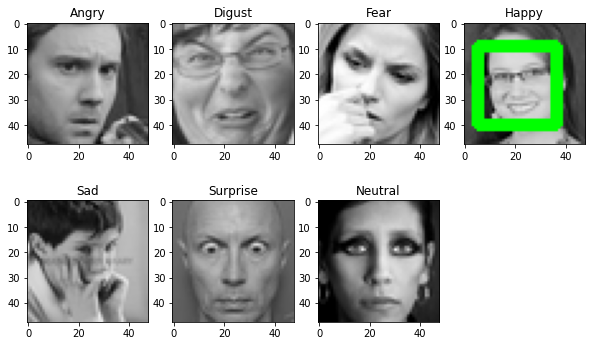

In [71]:
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(10,6))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[0]
    img = row2image(face)
    plt.subplot(2,4,i)
    annotate_1(img[0])
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(img[1])

plt.show() 

---
## Creating the CNN Model and Predicting the Emotions
---

### Train-Test Split

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [73]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [74]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

In [31]:
from keras import backend as K
path_model='model_filter.h5' # save model at this location after each epoch
tf.compat.v1.keras.backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=10, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/10
505/505 [==============================] - 532s 1s/step - loss: 1.6873 - accuracy: 0.3411 - val_loss: 1.6179 - val_accuracy: 0.3865
Epoch 2/10
505/505 [==============================] - 487s 965ms/step - loss: 1.3222 - accuracy: 0.4952 - val_loss: 1.2879 - val_accuracy: 0.4968
Epoch 3/10
505/505 [==============================] - 473s 936ms/step - loss: 1.1389 - accuracy: 0.5701 - val_loss: 1.2512 - val_accuracy: 0.5235
Epoch 4/10
505/505 [==============================] - 480s 950ms/step - loss: 1.0052 - accuracy: 0.6274 - val_loss: 1.2060 - val_accuracy: 0.5534
Epoch 5/10
505/505 [==============================] - 503s 996ms/step - loss: 0.8893 - accuracy: 0.6680 - val_loss: 1.1339 - val_accuracy: 0.5918
Epoch 6/10
505/505 [==============================] - 499s 988ms/step - loss: 0.7534 - accuracy: 0.7224 - val_loss: 1.1184 - val_accuracy: 0.5935
Epoch 7/10
505/505 [==============================] - 501s 991ms/step - loss: 0.5995 - accuracy: 0.7832 - val_loss: 1.1582 - va

In [48]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [75]:
#from keras.models import load_model
model =load_model(r'model_filter.h5')

y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

### Predicting the Emotions from Images Uploaded Externally

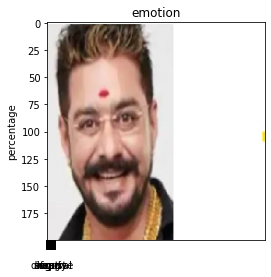

Expression Prediction: happy


In [87]:
from skimage import io
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('Images/hb_happy.jpg', grayscale=True, target_size=(48, 48))
show_img=load_img('Images/hb_happy.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

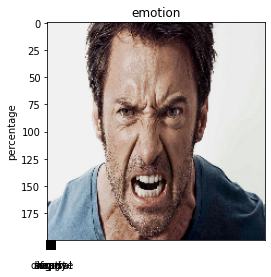

Expression Prediction: angry


In [89]:
from skimage import io
img = load_img('Images/angry.jpg', grayscale=True, target_size=(48, 48))
show_img=load_img('Images/angry.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])


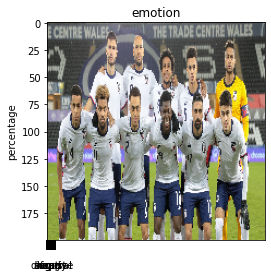

Expression Prediction: sad


In [112]:
from skimage import io
img = load_img('Images/MNT.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Images/MNT.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])


### Finding the Accuracy For CNN Model

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(y_pred, axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.5988


### Plotting the Confusion Matrix For CNN Model

In [98]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

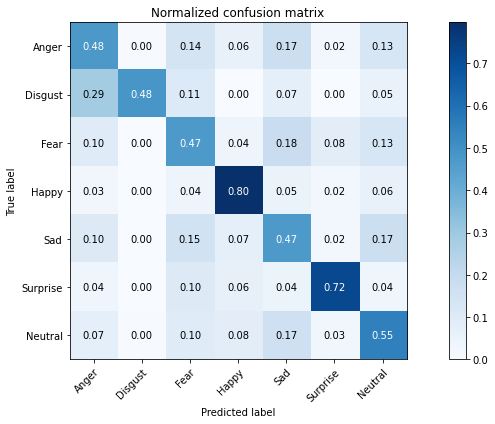

In [99]:
# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=label_map, normalize=True, title='Normalized confusion matrix')
plt.show()

---
## Creating the Deepface Model and Predicting the Emotions
---

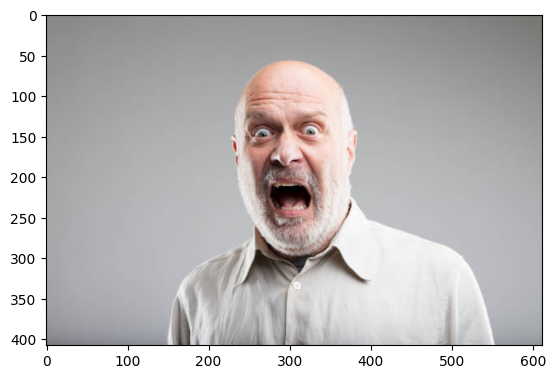

In [15]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

img_deep=cv2.imread("Images/fear.jpeg")
plt.imshow(cv2.cvtColor(img_deep,cv2.COLOR_BGR2RGB))

### Predicting the Emotions for An Individual Picture

In [16]:
pred=DeepFace.analyze(img_deep)

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 388ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  3.85it/s]

1/1 [==============================] - 0s 360ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  3.26it/s]

1/1 [==============================] - 0s 363ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  3.16it/s]


In [17]:
pred

{'emotion': {'angry': 13.935603030252095,
  'disgust': 0.00022055832786552752,
  'fear': 84.52950900441301,
  'happy': 0.018374989296310925,
  'sad': 0.06634414103622543,
  'surprise': 1.44983848037261,
  'neutral': 9.879313397594738e-05},
 'dominant_emotion': 'fear',
 'region': {'x': 224, 'y': 84, 'w': 150, 'h': 150},
 'age': 28,
 'gender': 'Man',
 'race': {'asian': 1.238787453621626,
  'indian': 6.7063696682453156,
  'black': 75.139981508255,
  'white': 1.8599402159452438,
  'middle eastern': 0.8746841922402382,
  'latino hispanic': 14.18023556470871},
 'dominant_race': 'black'}

In [22]:
pred['dominant_emotion']

'fear'

In [23]:
pred['age']

28

In [24]:
pred['dominant_race']

'black'

In [25]:
pred['gender']

'Man'

Number of faces detected: 1
Number of eyes detected: 2


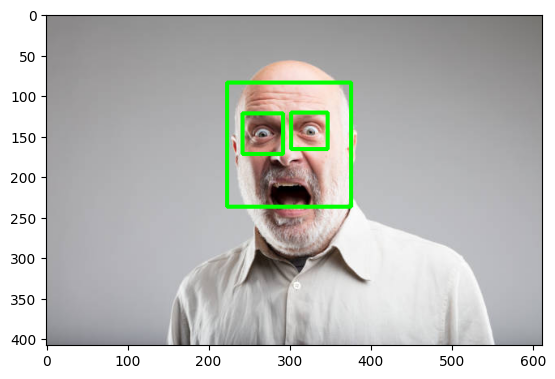

In [19]:
annotate(img_deep)

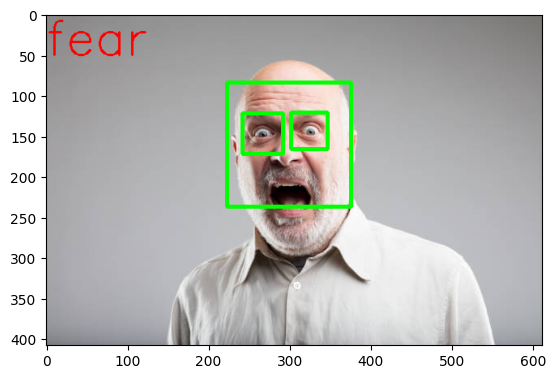

In [20]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_deep,
            pred['dominant_emotion'],
            (0,50),
            font, 2,
            (0,0,255),
            2,);
plt.imshow(cv2.cvtColor(img_deep, cv2.COLOR_BGR2RGB))

### Predicting the Emotions for A Group Picture

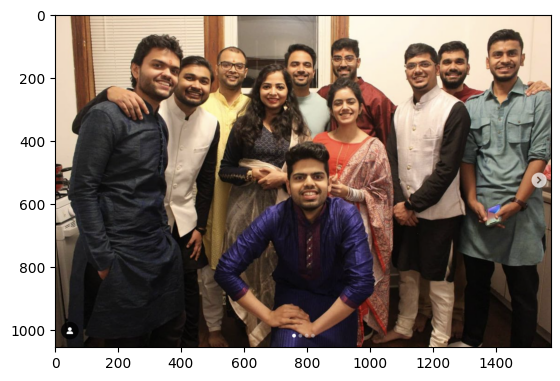

In [32]:
img_deep_grp=cv2.imread("Images/Diwali.png")
plt.imshow(cv2.cvtColor(img_deep_grp,cv2.COLOR_BGR2RGB))

In [33]:
pred=DeepFace.analyze(img_deep_grp)

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step


Action: age:  25%|████████                        | 1/4 [00:00<00:01,  2.86it/s]

1/1 [==============================] - 0s 410ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:01<00:01,  1.84it/s]

1/1 [==============================] - 0s 364ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:01<00:00,  2.14it/s]

1/1 [==============================] - 0s 355ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  2.26it/s]


In [34]:
pred['dominant_emotion']

'happy'

Number of faces detected: 13
Number of eyes detected: 5


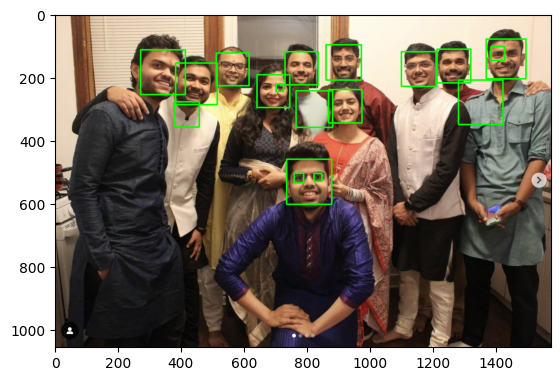

In [35]:
annotate(img_deep_grp)

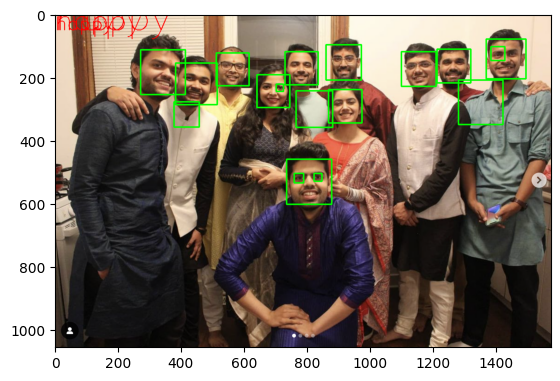

In [40]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_deep_grp,
            pred['dominant_emotion'],
            (0,50),
            font, 3,
            (0,0,255),
            2,);
plt.imshow(cv2.cvtColor(img_deep_grp, cv2.COLOR_BGR2RGB))

---
##  Manipulating the images using PIL (pillow) and Predicting the Emotions
---

### Resizing the Image to 48 * 48

In [48]:
image = Image.open('Images/happy.jpeg')
new_image = image.resize((48, 48))
new_image.save('Images/myimage.jpeg')

### Adjusting the brightness of the image

#### Now, we will brighten the image with a factor of 1, which gives our original image. Then with a factor of 1.5, which gives a brightened image. And then with a factor of 0.5, which gives a darkened image.

In [49]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("Images/myimage.jpeg")

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('Brightness/original-image.jpeg')

factor = 0.5 #darkens the image
im_output = enhancer.enhance(factor)
im_output.save('Brightness/darkened-image.jpeg')

factor = 1.5 #brightens the image
im_output = enhancer.enhance(factor)
im_output.save('Brightness/brightened-image.jpeg')

### Adjusting the contrast of the image


#### Now, we will change the image contrast with a factor of 1, which gives our original image. Then with a factor of 1.5, which increases the image’s contrast. And then with a factor of 0.5, which greys out the image.

In [50]:
#read the image
im = Image.open("Images/myimage.jpeg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('Contrast/original-image.jpeg')

factor = 0.5 #decrease constrast
im_output = enhancer.enhance(factor)
im_output.save('Contrast/less-contrast-image.jpeg')

factor = 1.5 #increase contrast
im_output = enhancer.enhance(factor)
im_output.save('Contrast/more-contrast-image.jpeg')

### Adjusting the sharpness of the image


#### Now, we will sharpen the image with a factor of 1, which gives our original image. Then with a factor of 2, which gives a sharpened image. And then with a factor of 0.05, which gives a blurred image.

In [52]:
from PIL import Image, ImageEnhance

im = Image.open("Images/myimage.jpeg")

enhancer = ImageEnhance.Sharpness(im)

factor = 1
im_s_1 = enhancer.enhance(factor)
im_s_1.save('Sharpness/original-image-1.jpeg');

factor = 0.05
im_s_1 = enhancer.enhance(factor)
im_s_1.save('Sharpness/blurred-image.jpeg');

factor = 2
im_s_1 = enhancer.enhance(factor)
im_s_1.save('Sharpness/sharpened-image.jpeg');

## Checking all the Manipulated Images with Deepface
---

### Brightness
---

#### Brightness: Using Deepface for Less Brightened Images

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 434ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  3.88it/s]

1/1 [==============================] - 0s 375ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  3.21it/s]

1/1 [==============================] - 0s 379ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  3.09it/s]

Number of faces detected: 1
Number of eyes detected: 0


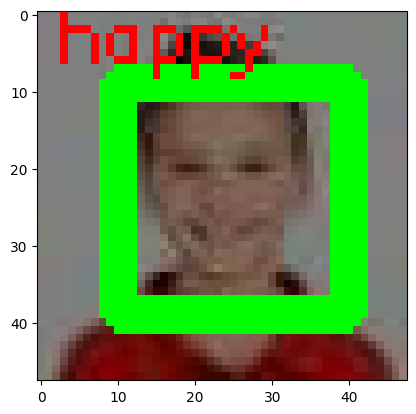

In [116]:
img_brt=cv2.imread("Brightness/darkened-image.jpeg")
pred=DeepFace.analyze(img_brt)
annotate(img_brt)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_brt,
            pred['dominant_emotion'],
            (2,6),
            font, 0.3,
            (0,0,255),
            0,);
plt.imshow(cv2.cvtColor(img_brt, cv2.COLOR_BGR2RGB))

#### Brightness: Using Deepface for More Brightened Images

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 433ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  3.82it/s]

1/1 [==============================] - 0s 372ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  3.18it/s]

1/1 [==============================] - 0s 376ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  3.08it/s]

Number of faces detected: 1
Number of eyes detected: 0


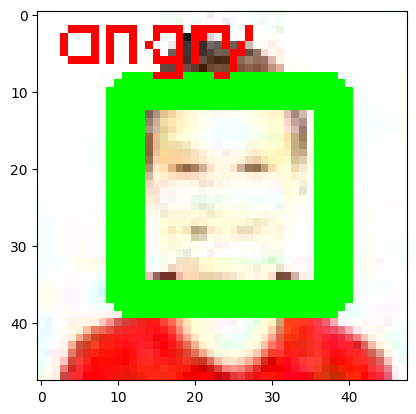

In [119]:
img_brt1=cv2.imread("Brightness/brightened-image.jpeg")
pred=DeepFace.analyze(img_brt1)
annotate(img_brt1)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_brt1,
            pred['dominant_emotion'],
            (2,6),
            font, 0.3,
            (0,0,255),
            0,);
plt.imshow(cv2.cvtColor(img_brt1, cv2.COLOR_BGR2RGB))

### Contrast
---

#### Contrast: Using Deepface for Less Contrast Images

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 412ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  4.07it/s]

1/1 [==============================] - 0s 372ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  3.29it/s]

1/1 [==============================] - 0s 381ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  3.15it/s]

Number of faces detected: 1
Number of eyes detected: 0


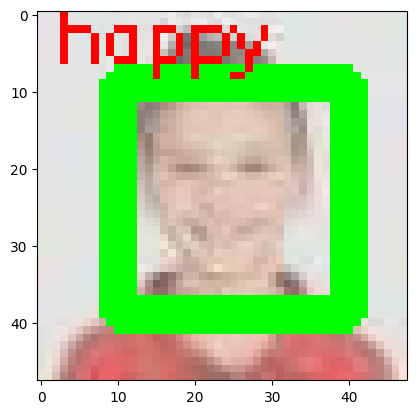

In [125]:
img_cnt=cv2.imread("Contrast/less-contrast-image.jpeg")
pred=DeepFace.analyze(img_cnt)
annotate(img_cnt)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_cnt,
            pred['dominant_emotion'],
            (2,6),
            font, 0.3,
            (0,0,255),
            0,);
plt.imshow(cv2.cvtColor(img_cnt, cv2.COLOR_BGR2RGB))

#### Contrast: Using Deepface for More Contrast Images

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 413ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  3.88it/s]

1/1 [==============================] - 0s 366ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  3.25it/s]

1/1 [==============================] - 0s 404ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  3.05it/s]

Number of faces detected: 1
Number of eyes detected: 0


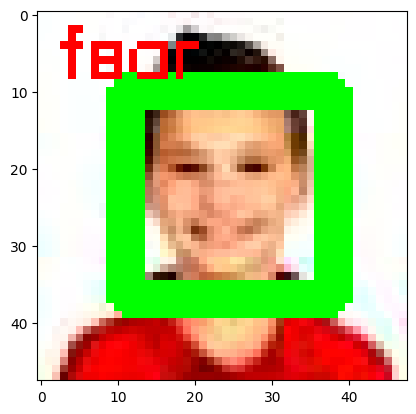

In [127]:
img_cnt1=cv2.imread("Contrast/more-contrast-image.jpeg")
pred=DeepFace.analyze(img_cnt1)
annotate(img_cnt1)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_cnt1,
            pred['dominant_emotion'],
            (2,8),
            font, 0.3,
            (0,0,255),
            0,);
plt.imshow(cv2.cvtColor(img_cnt1, cv2.COLOR_BGR2RGB))

### Sharpness
---

#### Sharpness: Using Deepface for Less Sharper Images

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 1s 506ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  3.44it/s]

1/1 [==============================] - 0s 385ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  2.98it/s]

1/1 [==============================] - 0s 382ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  2.89it/s]

Number of faces detected: 1
Number of eyes detected: 0


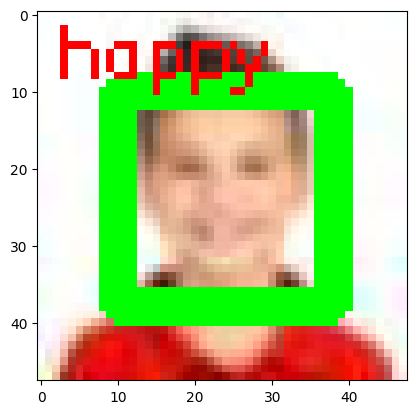

In [128]:
img_shrp=cv2.imread("Sharpness/blurred-image.jpeg")
pred=DeepFace.analyze(img_shrp)
annotate(img_shrp)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_shrp,
            pred['dominant_emotion'],
            (2,8),
            font, 0.3,
            (0,0,255),
            0,);
plt.imshow(cv2.cvtColor(img_shrp, cv2.COLOR_BGR2RGB))

#### Sharpness: Using Deepface for More Sharper Images

Action: emotion:   0%|                                    | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


Action: age:   0%|                                        | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 405ms/step


Action: gender:  50%|██████████████▌              | 2/4 [00:00<00:00,  4.18it/s]

1/1 [==============================] - 0s 368ms/step


Action: race:  75%|███████████████████████▎       | 3/4 [00:00<00:00,  3.34it/s]

1/1 [==============================] - 0s 387ms/step


Action: race: 100%|███████████████████████████████| 4/4 [00:01<00:00,  3.17it/s]

Number of faces detected: 1
Number of eyes detected: 0


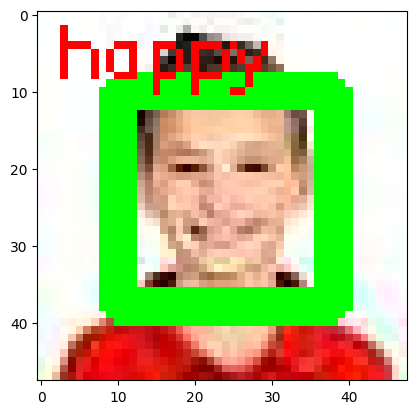

In [129]:
img_shrp1=cv2.imread("Sharpness/sharpened-image.jpeg")
pred=DeepFace.analyze(img_shrp1)
annotate(img_shrp1)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_shrp1,
            pred['dominant_emotion'],
            (2,8),
            font, 0.3,
            (0,0,255),
            0,);
plt.imshow(cv2.cvtColor(img_shrp1, cv2.COLOR_BGR2RGB))

## Checking all the Manipulated Images with CNN Model
---

### Brightness
---

In [101]:
image = Image.open('Images/angry.jpg')
new_image = image.resize((48, 48))
new_image.save('Images/myimage_cnn.jpeg')

In [102]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("Images/myimage_cnn.jpeg")

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('Brightness/original-image_cnn.jpeg')

factor = 0.5 #darkens the image
im_output = enhancer.enhance(factor)
im_output.save('Brightness/darkened-image_cnn.jpeg')

factor = 1.5 #brightens the image
im_output = enhancer.enhance(factor)
im_output.save('Brightness/brightened-image_cnn.jpeg')

### Contrast
---

In [103]:
#read the image
im = Image.open("Images/myimage_cnn.jpeg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output = enhancer.enhance(factor)
im_output.save('Contrast/original-image_cnn.jpeg')

factor = 0.5 #decrease constrast
im_output = enhancer.enhance(factor)
im_output.save('Contrast/less-contrast-image_cnn.jpeg')

factor = 1.5 #increase contrast
im_output = enhancer.enhance(factor)
im_output.save('Contrast/more-contrast-image_cnn.jpeg')

### Sharpness
---

In [104]:
from PIL import Image, ImageEnhance

im = Image.open("Images/myimage_cnn.jpeg")

enhancer = ImageEnhance.Sharpness(im)

factor = 1
im_s_1 = enhancer.enhance(factor)
im_s_1.save('Sharpness/original-image-1_cnn.jpeg');

factor = 0.05
im_s_1 = enhancer.enhance(factor)
im_s_1.save('Sharpness/blurred-image_cnn.jpeg');

factor = 2
im_s_1 = enhancer.enhance(factor)
im_s_1.save('Sharpness/sharpened-image_cnn.jpeg');

c:\users\tv\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


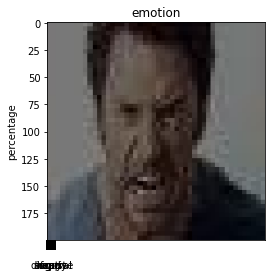

Expression Prediction: angry


In [105]:
from skimage import io
img = load_img('Brightness/darkened-image_cnn.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Brightness/darkened-image_cnn.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

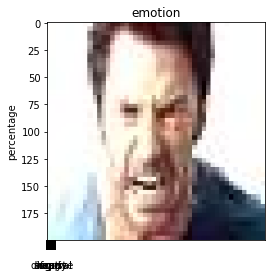

Expression Prediction: angry


In [106]:
from skimage import io
img = load_img('Brightness/brightened-image_cnn.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Brightness/brightened-image_cnn.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

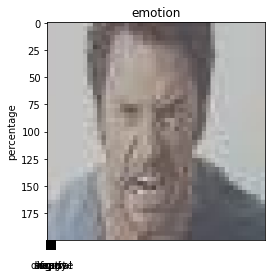

Expression Prediction: angry


In [107]:
from skimage import io
img = load_img('Contrast/less-contrast-image_cnn.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Contrast/less-contrast-image_cnn.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

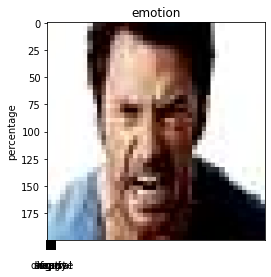

Expression Prediction: angry


In [108]:
from skimage import io
img = load_img('Contrast/more-contrast-image_cnn.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Contrast/more-contrast-image_cnn.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

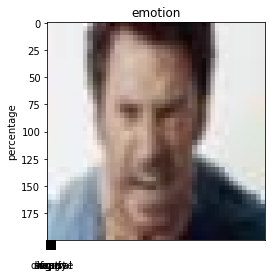

Expression Prediction: angry


In [109]:
from skimage import io
img = load_img('Sharpness/blurred-image_cnn.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Sharpness/blurred-image_cnn.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

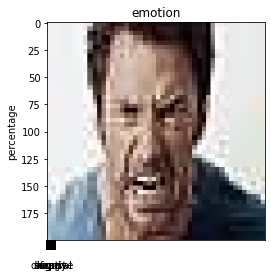

Expression Prediction: angry


In [110]:
from skimage import io
img = load_img('Sharpness/sharpened-image_cnn.jpeg', grayscale=True, target_size=(48, 48))
show_img=load_img('Sharpness/sharpened-image_cnn.jpeg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

## Real-Time Emotion Detection Through Webcam

### Using Deepface

In [ ]:
DeepFace.stream("Images")

### Using CNN